# Import needed libraries

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import random

random.seed(123)

In [3]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


# Import python modules

In [4]:
# Get the absolute path of the folders that contain the modules
[sys.path.append(os.path.abspath(os.path.join(os.getcwd(), path))) for path in ["../src/data/", "../src/features/models/"]]

# Import notebooks
import download_datasets
import dataset_controls
import random_data_generator
import logistic_model

# Download files from cloud

In [5]:
# File IDs dictionary
file_ids = {
    "dim_people": "1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR",
    "fact_games_played": "1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN", 
}

# Get the path two levels up from the current working directory
base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# Loop through all files in the dictionary and download them
for file_name, file_id in file_ids.items():
    print(f"Downloading {file_name}...")
    
    # Construct the full URL to download the file using the file ID
    url = f"https://drive.google.com/uc?id={file_id}"
    
    # Call the function to download the file with the constructed URL
    download_datasets.download_file_from_cloud(url, base_path)

    print(f"{file_name} saved successfully!\n")

Downloading...
From: https://drive.google.com/uc?id=1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR
To: c:\Users\carme\Documents\SeniorTrAIning\main_data\notebooks\dim_people.csv
100%|██████████| 191k/191k [00:00<00:00, 3.56MB/s]


File saved at: c:\Users\carme\Documents\dim_people.csv
File successfully loaded. First rows:
dim_people saved successfully!



Downloading...
From: https://drive.google.com/uc?id=1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN
To: c:\Users\carme\Documents\SeniorTrAIning\main_data\notebooks\fact_games_played.csv
100%|██████████| 54.0/54.0 [00:00<00:00, 54.3kB/s]

File saved at: c:\Users\carme\Documents\fact_games_played.csv
File successfully loaded. First rows:
fact_games_played saved successfully!



# Load the dataframes

In [6]:
dict_dfs = download_datasets.opening_dataframes(file_ids, base_path)

Loading dim_people.csv...
Loading fact_games_played.csv...


# Generate random data

## DIM_people

In [7]:
random_data_generator.change_id_to_autoincrement(dict_dfs['dim_people'])

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,9/27/1955,77,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,2/26/1959,88,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,6/22/1956,82,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,11/6/1951,100,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,11/24/1952,65,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,12/7/1957,99,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,11/23/1953,34,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,3/27/1952,43,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,6/7/1952,30,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [8]:
dataset_controls.calculate_age(dict_dfs['dim_people'], 'date_birth')

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,66,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [9]:
dict_dfs['dim_people']['country'] = 'Spain'

In [10]:
# Apply the estimation of languages spoken 
dict_dfs['dim_people']['languages_spoken'] = dict_dfs['dim_people'].apply(lambda row: random_data_generator.estimate_languages_spoken(row['age'], row['education_level']), axis=1)

In [11]:
dict_dfs['dim_people']

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Spain,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,1,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,66,Rupiah,Bogorejo,Spain,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,2,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Spain,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,2,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Spain,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,1,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Spain,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,2,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Spain,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,1,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Spain,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,1,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Spain,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,3+,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,Spain,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,2,152,76,Arthritis,Aspirin,Yoga


In [12]:
final_model_dataframe = dict_dfs['dim_people'][['email', 'age', 'education_level', 'languages_spoken', 'gender']]

## FACT_games_played

In [13]:
fact_games_played = pd.DataFrame({'success': np.random.uniform(0, 1, size=10000)})

In [14]:
values = np.floor(fact_games_played['success'] * 100)/ 100

In [15]:
fact_games_played['success_proportion'] = values

In [16]:
fact_games_played['average_time'] = np.random.uniform(0, 3, size=10000)

In [17]:
fact_games_played

,success,success_proportion,average_time
0,0.626725,0.62,2.524876
1,0.207180,0.20,0.904077
2,0.909753,0.90,0.700890
3,0.448858,0.44,1.247165
4,0.304812,0.30,1.536945
...,...,...,...
9995,0.428198,0.42,0.798044
9996,0.073221,0.07,0.866923
9997,0.842883,0.84,2.904541
9998,0.949481,0.94,1.557208


In [18]:
# Add user information to fact games

# Add email as key id
random.seed(123)
emails_list = random.choices(dict_dfs['dim_people']["email"], k=10000)
fact_games_played["email"] = [str(emails_list[i]) for i in range(0, len(emails_list))]
fact_games_played


,success,success_proportion,average_time,email
0,0.626725,0.62,2.524876,llewcock1g@opera.com
1,0.207180,0.20,0.904077,khenric2f@mozilla.org
2,0.909753,0.90,0.700890,aruggsbb@scientificamerican.com
3,0.448858,0.44,1.247165,bmcgowan2z@mozilla.org
4,0.304812,0.30,1.536945,lgraalmansp1@about.me
...,...,...,...,...
9995,0.428198,0.42,0.798044,jyuj4@independent.co.uk
9996,0.073221,0.07,0.866923,dhoferl5@mtv.com
9997,0.842883,0.84,2.904541,lgherardellilj@bizjournals.com
9998,0.949481,0.94,1.557208,rdimmick3v@cyberchimps.com


# Joining dataframes

In [19]:
merged_dataframe = pd.merge(final_model_dataframe, fact_games_played, on='email', how='inner')
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time
0,tmathy0@mapquest.com,69,University,1,Male,0.082169,0.08,2.269175
1,tmathy0@mapquest.com,69,University,1,Male,0.792977,0.79,1.001572
2,tmathy0@mapquest.com,69,University,1,Male,0.087942,0.08,2.300425
3,tmathy0@mapquest.com,69,University,1,Male,0.461854,0.46,1.389362
4,tmathy0@mapquest.com,69,University,1,Male,0.495794,0.49,2.146543
...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,2,Male,0.493808,0.49,2.374760
9996,bpischoffrr@myspace.com,67,University,2,Male,0.776959,0.77,0.154509
9997,bpischoffrr@myspace.com,67,University,2,Male,0.544863,0.54,1.218523
9998,bpischoffrr@myspace.com,67,University,2,Male,0.346274,0.34,2.154950


In [20]:
# final_model_dataframe['email'] = final_model_dataframe['email'].astype(str)
# fact_games_played['email'] = fact_games_played['email'].astype(str)

# final_model_dataframe_facts = pd.merge(final_model_dataframe, fact_games_played, on="email", how="right")

In [21]:
# # No sé por qué me da error acá
# #final_model_dataframe_facts = final_model_dataframe.join(fact_games_played, on=["email"], how="right")
# #final_model_dataframe_facts

# # Por ahora uso el que tiene 1000 obs
# final_model_dataframe_facts = final_model_dataframe

In [22]:
# Make average reaction time and accuracy in game a function of age and education 
merged_dataframe["average_time"] = merged_dataframe.apply(lambda row: random_data_generator.generate_reaction_time(row['age'], row['education_level']), axis=1)
merged_dataframe["accuracy"] = merged_dataframe.apply(lambda row: random_data_generator.generate_accuracy(row['age'], row['education_level']), axis=1)
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time,accuracy
0,tmathy0@mapquest.com,69,University,1,Male,0.082169,0.08,4.993992,0.109869
1,tmathy0@mapquest.com,69,University,1,Male,0.792977,0.79,5.518176,0.494307
2,tmathy0@mapquest.com,69,University,1,Male,0.087942,0.08,3.621981,0.151993
3,tmathy0@mapquest.com,69,University,1,Male,0.461854,0.46,5.359068,0.223793
4,tmathy0@mapquest.com,69,University,1,Male,0.495794,0.49,5.618769,0.562732
...,...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,2,Male,0.493808,0.49,5.427211,0.143844
9996,bpischoffrr@myspace.com,67,University,2,Male,0.776959,0.77,5.468045,0.443200
9997,bpischoffrr@myspace.com,67,University,2,Male,0.544863,0.54,5.710906,0.344915
9998,bpischoffrr@myspace.com,67,University,2,Male,0.346274,0.34,5.600897,0.055987


In [23]:
merged_dataframe.describe()

,age,success,success_proportion,average_time,accuracy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.120000,0.498123,0.493153,6.134209,0.379896
std,3.214535,0.287469,0.287410,1.183425,0.257542
min,64.000000,0.000017,0.000000,2.000000,0.050005
25%,66.000000,0.250140,0.250000,5.318959,0.171265
50%,69.000000,0.494865,0.490000,6.129592,0.287703
75%,72.000000,0.748999,0.740000,6.960930,0.557779
max,75.000000,0.999929,0.990000,10.000000,0.999890


In [24]:
merged_dataframe["average_time"].quantile(0.75)

6.9609296049779985

In [25]:
# Generate cognitive level value
time_reference = merged_dataframe["average_time"].quantile(0.75)
acc_reference = 0.5
merged_dataframe["cog_level"] = merged_dataframe.apply(lambda row: random_data_generator.generate_cog_state(row["average_time"], row["accuracy"], time_reference, acc_reference ), axis=1)

In [26]:
# Check
merged_dataframe.describe()

,age,success,success_proportion,average_time,accuracy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.120000,0.498123,0.493153,6.134209,0.379896
std,3.214535,0.287469,0.287410,1.183425,0.257542
min,64.000000,0.000017,0.000000,2.000000,0.050005
25%,66.000000,0.250140,0.250000,5.318959,0.171265
50%,69.000000,0.494865,0.490000,6.129592,0.287703
75%,72.000000,0.748999,0.740000,6.960930,0.557779
max,75.000000,0.999929,0.990000,10.000000,0.999890


# Train model for the first game

c:\Users\carme\Documents\SeniorTrAIning\main_data\src\features\models\logistic_model.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].replace({
c:\Users\carme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\carme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\carme\anaconda3\lib\site-packages\s

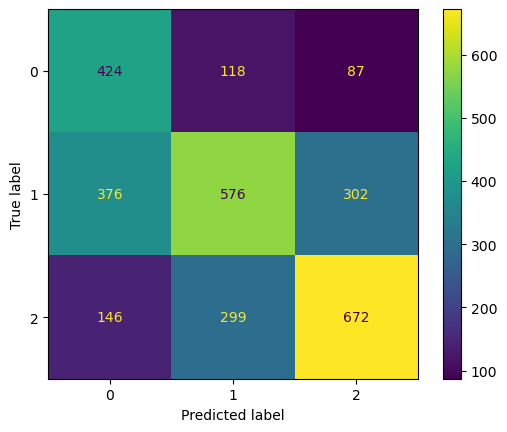

Accuracy: 0.5573333333333333
Recall: 0.5573333333333333
F1 Score: 0.5569483437195927


In [27]:
logistic_model = logistic_model.logistic_regression_game01(merged_dataframe, 'precision', 0)

In [28]:
# Obtain the coefficients of the best model
feature_importance = pd.DataFrame({
    "Feature": logistic_model.feature_names_in_,  # Variable names
    "Coefficient": logistic_model.coef_[2]  # Model coefficients
})

# Ordenar por importancia absoluta
feature_importance["Exp_Coefficient"] = np.exp(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Exp_Coefficient", ascending=False)


In [29]:
print(feature_importance)

                          Feature  Coefficient  Exp_Coefficient
2                        accuracy     0.223170         1.250033
5                     gender_Male     0.047173         1.048304
6                    gender_Other     0.033586         1.034156
8             languages_spoken_3+     0.009840         1.009888
0                             age     0.003590         1.003596
7              languages_spoken_2    -0.024817         0.975488
4      education_level_University    -0.078201         0.924778
3  education_level_Primary School    -0.078619         0.924392
1                    average_time    -0.321881         0.724785


In [30]:
import numpy as np
print(np.__version__)

1.23.5
